In [36]:
# 코드실행시 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

In [37]:
# 맨 앞쪽에 ! 사용하면 리눅스 명령어를 수행할수 있습니다.
# !pip install seaborn

In [38]:
%pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
# import 명령 사용하면 됩니다.
# numpy와 pandas 라이브러리 임포트 합니다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


%matplotlib inline

In [40]:
# # KT AIDU 플랫폼 사용 시
# from aicentro.session import Session
# from aicentro.framework.keras import Keras as AiduFrm

# aidu_session = Session(verify=False)
# aidu_framework = AiduFrm(session=aidu_session)

In [41]:
# aidu_framework.config.data_dir # 내용 확인
# aidu_framework.config.data_dir

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_csv("/content/drive/MyDrive/AIVLE/4월/mini5/미니프로젝트 5차_2일차_실습파일/nav_data.csv", encoding="cp949")
df.head()

,Time_Departure,Time_Arrival,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
0,35:21.0,55:22.6,12914,1201.534058,38.692536,경기도,광명시,7,0,5,20
1,55:22.0,09:06.9,7483,823.817017,32.699980,서울특별시,영등포구,31,0,5,20
2,13:46.0,22:32.9,8087,526.710998,55.273575,경기도,김포시,6,0,0,20
3,13:43.0,28:42.7,10528,898.581970,42.178456,경기도,광주시,2,0,0,20
4,01:57.0,17:58.2,10636,957.758972,39.978326,경기도,안산시 상록구,28,0,0,20


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55531 entries, 0 to 55530
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time_Departure  55531 non-null  object 
 1   Time_Arrival    55531 non-null  object 
 2   Distance        55531 non-null  int64  
 3   Time_Driving    55531 non-null  float64
 4   Speed_Per_Hour  55531 non-null  float64
 5   Address1        55531 non-null  object 
 6   Address2        55531 non-null  object 
 7   Signaltype      55531 non-null  int64  
 8   Weekday         55531 non-null  int64  
 9   Hour            55531 non-null  int64  
 10  Day             55531 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 4.7+ MB


In [45]:
df.describe()

,Distance,Time_Driving,Speed_Per_Hour,Signaltype,Weekday,Hour,Day
count,55531.000000,55531.000000,55531.000000,55531.000000,55531.000000,55531.000000,55531.000000
mean,7041.212548,967.215437,29.906554,19.164197,2.379644,13.158902,22.379644
std,3265.541600,517.927018,14.444940,13.977421,1.384683,4.806116,1.384683
min,3000.000000,120.852997,2.143031,0.000000,0.000000,0.000000,20.000000
25%,4272.000000,600.340027,19.773403,9.000000,1.000000,9.000000,21.000000
50%,6153.000000,875.612976,26.771460,17.000000,3.000000,13.000000,23.000000
75%,9297.500000,1200.483033,36.671566,27.000000,4.000000,17.000000,24.000000
max,15000.000000,7966.559082,137.042329,101.000000,4.000000,23.000000,24.000000


In [46]:
print(df.value_counts)

<bound method DataFrame.value_counts of       Time_Departure Time_Arrival  Distance  Time_Driving  Speed_Per_Hour  \
0            35:21.0      55:22.6     12914   1201.534058       38.692536   
1            55:22.0      09:06.9      7483    823.817017       32.699980   
2            13:46.0      22:32.9      8087    526.710998       55.273575   
3            13:43.0      28:42.7     10528    898.581970       42.178456   
4            01:57.0      17:58.2     10636    957.758972       39.978326   
...              ...          ...       ...           ...             ...   
55526        57:07.0      06:15.7      4448    544.301025       29.419015   
55527        57:26.0      07:15.3      3106    535.666992       20.874163   
55528        57:46.0      07:56.8     10325    610.799988       60.854618   
55529        58:03.0      12:42.4      4458    878.479004       18.268849   
55530        58:56.0      08:10.4      3780    553.580994       24.581769   

      Address1 Address2  Signaltype

In [47]:
df.isnull().sum()

Time_Departure    0
Time_Arrival      0
Distance          0
Time_Driving      0
Speed_Per_Hour    0
Address1          0
Address2          0
Signaltype        0
Weekday           0
Hour              0
Day               0
dtype: int64

<Axes: >

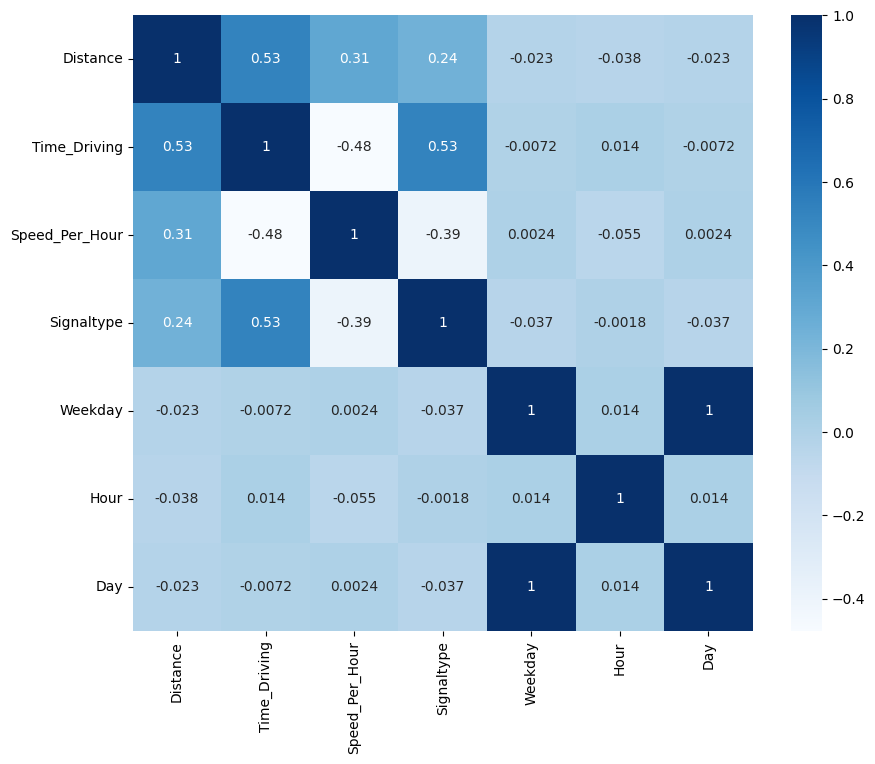

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

<Figure size 800x900 with 0 Axes>

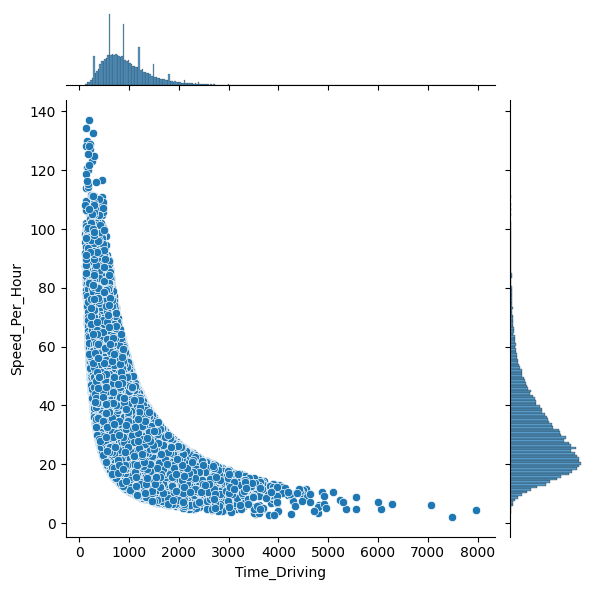

In [49]:
plt.figure(figsize=(8, 9))
sns.jointplot(x='Time_Driving', y='Speed_Per_Hour', data=df)

In [50]:
df_temp = df.drop(['Time_Departure', "Time_Arrival"], axis=1)
df_temp

,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
0,12914,1201.534058,38.692536,경기도,광명시,7,0,5,20
1,7483,823.817017,32.699980,서울특별시,영등포구,31,0,5,20
2,8087,526.710998,55.273575,경기도,김포시,6,0,0,20
3,10528,898.581970,42.178456,경기도,광주시,2,0,0,20
4,10636,957.758972,39.978326,경기도,안산시 상록구,28,0,0,20
...,...,...,...,...,...,...,...,...,...
55526,4448,544.301025,29.419015,경기도,파주시,22,4,23,24
55527,3106,535.666992,20.874163,서울특별시,구로구,16,4,23,24
55528,10325,610.799988,60.854618,서울특별시,광진구,5,4,23,24
55529,4458,878.479004,18.268849,서울특별시,구로구,32,4,23,24


In [51]:
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()

df_temp['Address1'] = encoder1.fit_transform(df_temp['Address1'])
df_temp['Address2'] = encoder2.fit_transform(df_temp['Address2'])
df_temp['Hour'] = encoder3.fit_transform(df_temp['Hour'])
df_temp['Day'] = encoder4.fit_transform(df_temp['Day'])

df_temp

,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
0,12914,1201.534058,38.692536,2,12,7,0,5,0
1,7483,823.817017,32.699980,3,57,31,0,5,0
2,8087,526.710998,55.273575,2,19,6,0,0,0
3,10528,898.581970,42.178456,2,13,2,0,0,0
4,10636,957.758972,39.978326,2,47,28,0,0,0
...,...,...,...,...,...,...,...,...,...
55526,4448,544.301025,29.419015,2,72,22,4,23,4
55527,3106,535.666992,20.874163,3,15,16,4,23,4
55528,10325,610.799988,60.854618,3,14,5,4,23,4
55529,4458,878.479004,18.268849,3,15,32,4,23,4


In [52]:
df_temp = pd.get_dummies(data=df_temp, columns=['Hour', 'Day', 'Address1', 'Address2'], drop_first=True)
df_temp.head()

,Distance,Time_Driving,Speed_Per_Hour,Signaltype,Weekday,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,...,Address2_68,Address2_69,Address2_70,Address2_71,Address2_72,Address2_73,Address2_74,Address2_75,Address2_76,Address2_77
0,12914,1201.534058,38.692536,7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,7483,823.817017,32.699980,31,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8087,526.710998,55.273575,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10528,898.581970,42.178456,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10636,957.758972,39.978326,28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
x = df_temp.drop('Time_Driving', axis=1)
y = df_temp['Time_Driving']
y.head()

0    1201.534058
1     823.817017
2     526.710998
3     898.581970
4     957.758972
Name: Time_Driving, dtype: float64

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2023)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((38871, 114), (16660, 114), (38871,), (16660,))

In [55]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
# # 자동으로 데이터 유형 지정 
from pycaret.regression import *
exp_reg101 = setup(data = df_temp, target = 'Time_Driving', session_id=123)

,Description,Value
0,Session id,123
1,Target,Time_Driving
2,Target type,Regression
3,Original data shape,"(55531, 115)"
4,Transformed data shape,"(55531, 115)"
5,Transformed train set shape,"(38871, 115)"
6,Transformed test set shape,"(16660, 115)"
7,Numeric features,114
8,Preprocess,True
9,Imputation type,simple


In [57]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.0649,965.5650,25.3688,0.9966,0.0084,0.0036,14.1160
xgboost,Extreme Gradient Boosting,11.5962,1142.0630,30.3732,0.9959,0.0169,0.0120,6.9160
et,Extra Trees Regressor,4.5178,1303.3659,30.3116,0.9954,0.0096,0.0038,18.2840
gbr,Gradient Boosting Regressor,18.8879,1283.8675,33.8480,0.9953,0.0300,0.0215,3.4390
dt,Decision Tree Regressor,10.3030,1670.8440,36.8941,0.9940,0.0163,0.0095,0.3410
lightgbm,Light Gradient Boosting Machine,12.6360,2958.5060,51.7160,0.9893,0.0229,0.0125,0.4590
knn,K Neighbors Regressor,98.9401,45344.0977,211.9149,0.8321,0.1264,0.0826,0.8160
lr,Linear Regression,156.4916,63706.5074,251.9444,0.7632,0.3584,0.2140,0.5190
ridge,Ridge Regression,156.4807,63704.4908,251.9403,0.7632,0.3585,0.2140,0.0940
br,Bayesian Ridge,156.3620,63720.4496,251.9694,0.7631,0.3597,0.2139,0.4070


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [76]:
best_tune = tune_model(best)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:58:21
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: ignored

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

In [59]:
model.fit(x_train, y_train)
dt_pred = model.predict(x_test)

In [60]:
from sklearn.metrics import r2_score , mean_squared_error
print(mean_squared_error(y_test, dt_pred)**0.5)
print(r2_score(y_test, dt_pred))

47.32464689375277
0.9919156952040222


<Axes: xlabel='Time_Driving'>

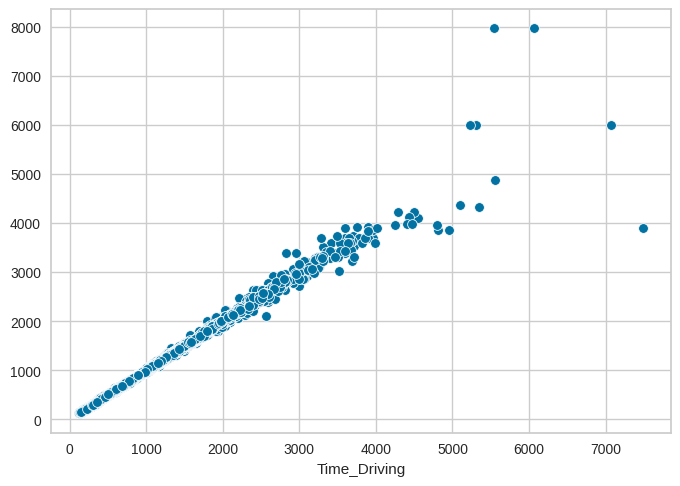

In [62]:
sns.scatterplot(x=y_test, y=dt_pred)

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)
rf_pred = model.predict(x_test)

In [28]:
from sklearn.metrics import r2_score , mean_squared_error
print('rmse: ', mean_squared_error(y_test, rf_pred)**0.5)
print('r2 score: ', r2_score(y_test, rf_pred))

rmse:  38.43612616796383
r2 score:  0.9946673002116729


<Axes: xlabel='Time_Driving'>

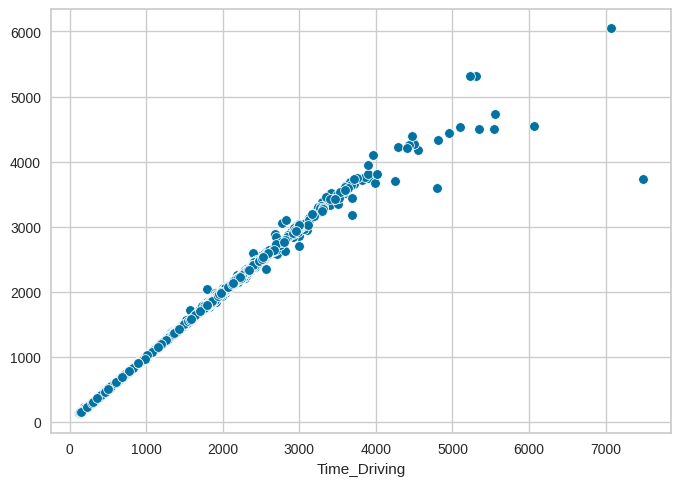

In [63]:
sns.scatterplot(x=y_test, y=rf_pred)

### **CatBoost**

In [ ]:
%pip install catboost

In [83]:
from catboost import CatBoostRegressor

model = CatBoostRegressor()

model.fit(x_train, y_train)
cb_pred = model.predict(x_test)

Learning rate set to 0.073003
0:	learn: 483.4500989	total: 51.3ms	remaining: 51.3s
1:	learn: 455.1411183	total: 55.3ms	remaining: 27.6s
2:	learn: 428.6668249	total: 58.9ms	remaining: 19.6s
3:	learn: 403.9183425	total: 62.4ms	remaining: 15.5s
4:	learn: 380.5675148	total: 65.8ms	remaining: 13.1s
5:	learn: 360.0728945	total: 69.3ms	remaining: 11.5s
6:	learn: 340.1176444	total: 72.9ms	remaining: 10.3s
7:	learn: 321.1744642	total: 76.4ms	remaining: 9.47s
8:	learn: 303.2460534	total: 79.9ms	remaining: 8.79s
9:	learn: 286.5611051	total: 83.3ms	remaining: 8.25s
10:	learn: 271.4133383	total: 87.1ms	remaining: 7.83s
11:	learn: 256.6940110	total: 90.8ms	remaining: 7.48s
12:	learn: 243.2646075	total: 94.6ms	remaining: 7.18s
13:	learn: 231.0475643	total: 98.2ms	remaining: 6.92s
14:	learn: 219.1668024	total: 102ms	remaining: 6.69s
15:	learn: 207.7355055	total: 106ms	remaining: 6.49s
16:	learn: 197.9070861	total: 109ms	remaining: 6.32s
17:	learn: 188.8937403	total: 113ms	remaining: 6.16s
18:	learn: 1

In [84]:
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error
print('rmse: ', mean_squared_error(y_test, cb_pred)**0.5)
print('mse: ', mean_squared_error(y_test, cb_pred))
print('mae: ', mean_absolute_error(y_test, cb_pred))
print('r2 score: ', r2_score(y_test, cb_pred))

rmse:  75.32759194219949
mse:  5674.246107810517
mae:  10.688781582270419
r2 score:  0.9795178245023565


<Axes: xlabel='Time_Driving'>

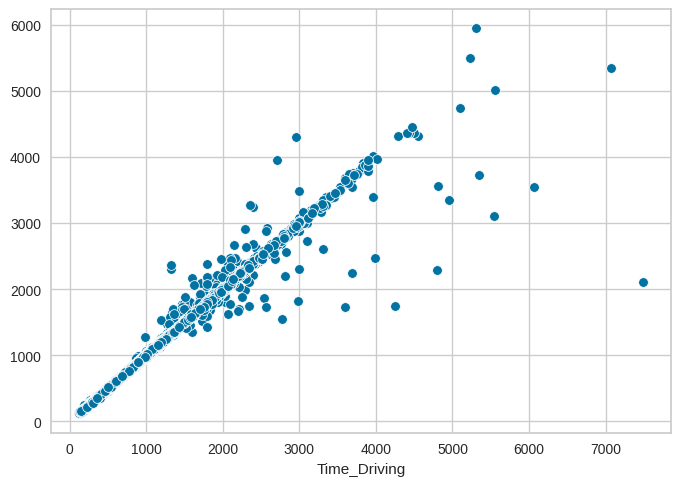

In [85]:
sns.scatterplot(x=y_test, y=cb_pred)

### Sequential Model(Deep Learning)

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, Flatten
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model


In [65]:
x_train.shape[1]

114

In [66]:
clear_session()

model = keras.Sequential()
model.add(Input(shape=(x_train.shape[1])))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae',
            optimizer='adam',
            metrics=['mae', 'mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7360      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 90,049
Trainable params: 90,049
Non-traina

In [71]:
es = EarlyStopping(monitor='val_loss',
                  min_delta = 0,
                  verbose = 1,
                  patience = 5,
                  restore_best_weights = True)
check = ModelCheckpoint('best_model.h5', monitor='val_mae', mode='min', save_best_only=True)
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[es, check]).history

Epoch 1/100
972/972 [==============================] - 3s 4ms/step - loss: 129.5091 - mae: 129.5091 - mse: 47560.7422 - val_loss: 96.1449 - val_mae: 96.1449 - val_mse: 44772.5391
Epoch 2/100
972/972 [==============================] - 4s 4ms/step - loss: 114.0664 - mae: 114.0664 - mse: 68387.0156 - val_loss: 75.8511 - val_mae: 75.8511 - val_mse: 89271.3125
Epoch 3/100
972/972 [==============================] - 3s 3ms/step - loss: 106.1345 - mae: 106.1345 - mse: 64508.1562 - val_loss: 85.3561 - val_mae: 85.3561 - val_mse: 187757.9375
Epoch 4/100
972/972 [==============================] - 3s 3ms/step - loss: 100.9491 - mae: 100.9491 - mse: 39573.9883 - val_loss: 65.0274 - val_mae: 65.0274 - val_mse: 368371.4688
Epoch 5/100
972/972 [==============================] - 3s 3ms/step - loss: 96.9575 - mae: 96.9575 - mse: 36104.5586 - val_loss: 76.8283 - val_mae: 76.8283 - val_mse: 536912.6250
Epoch 6/100
972/972 [==============================] - 4s 4ms/step - loss: 94.4875 - mae: 94.4875 - mse:

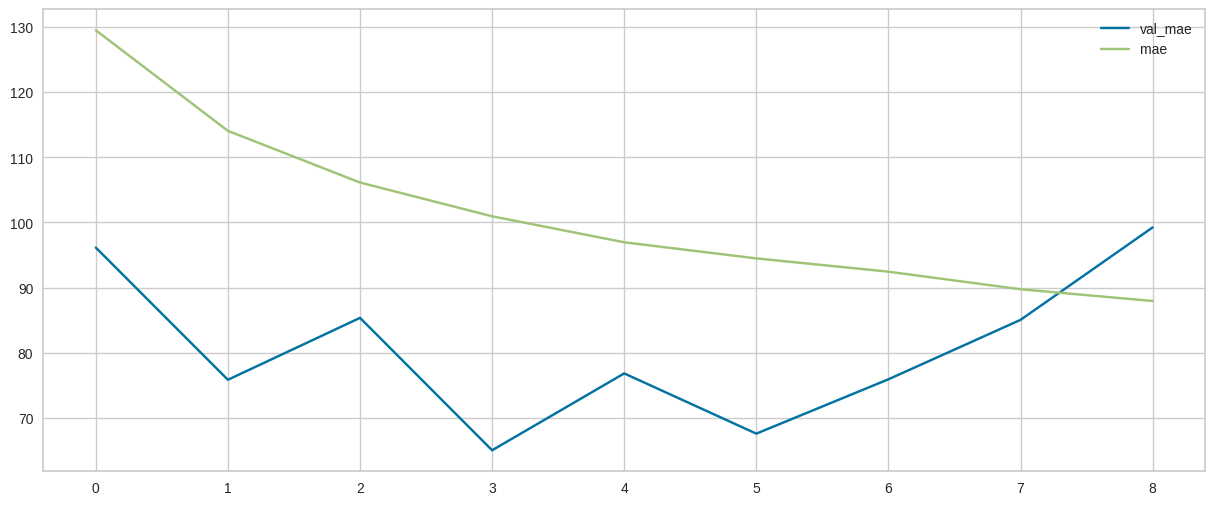

In [75]:
histlist = ['val_mae', 'mae']
plt.figure(figsize=(15, 6))
for i in histlist:
    plt.plot(hist[i], label=i)

plt.legend()
plt.show()

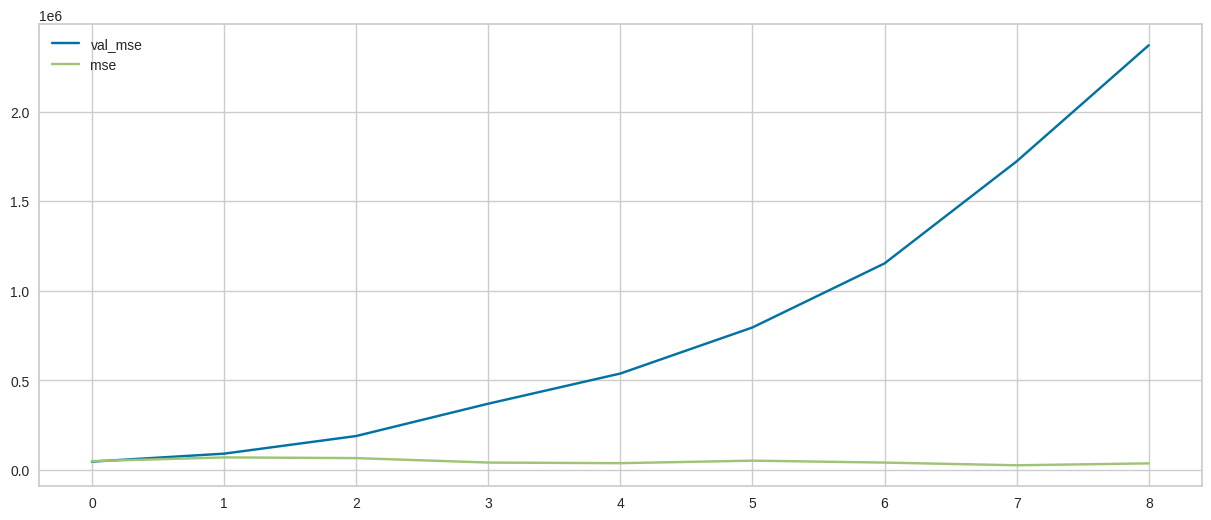

In [74]:
histlist2 = ['val_mse', 'mse']
plt.figure(figsize=(15, 6))
for i in histlist2:
    plt.plot(hist[i], label=i)

plt.legend()
plt.show()